# Thao tác với dataset fashion-mnist dùng numpy

## Giới thiệu sơ về fashion-mnist




## Load data dùng numpy


```python
# import os: dùng chỗ xử lý đương dẫn file (file path) 
import os 

# dùng gzip để giải nén (unzip) những file .gz
import gzip

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print("Here are the input datasets: ")
print(check_output(["ls", "../fashion-mnist-master/data/fashion"]).decode("utf8"))

print("Python Version: ")
!python -V
# Any results you write to the current directory are saved as output.
```

```python
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels
```

```python
# Load the data
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')
m_train = X_train.shape[0]
m_test = X_test.shape[0]

print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
```


```python
# random check with nine training examples
np.random.seed(0);
indices = list(np.random.randint(m_train,size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.tight_layout()
```

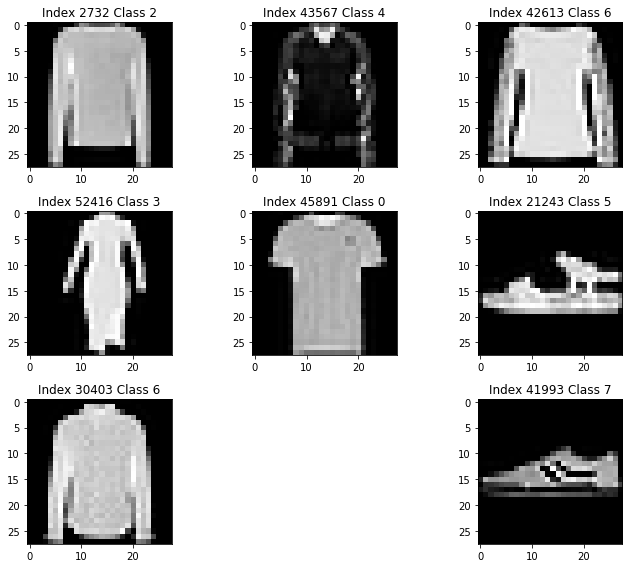

```python
#Preprocessing

# Subsample the data
m_train = 59000
m_validation = 1000

mask = list(range(m_train, m_train + m_validation))
X_val = X_train[mask]
y_val = y_train[mask]

mask = list(range(m_train))
X_train = X_train[mask]
y_train = y_train[mask]

mask = list(range(m_test))
X_test = X_test[mask]
y_test = y_test[mask]
```


```python
# Reshape data to rows
X_train = X_train.reshape(m_train, -1)
X_val = X_val.reshape(m_validation, -1)
X_test = X_test.reshape(m_test, -1)
```

```python
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_val shape: " + str(X_val.shape))
print("y_val shape: " + str(y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of validation examples: m_validation = " + str(m_validation))
print ("Number of testing examples: m_test = " + str(m_test))
```